In [3]:
# important important libraries

import numpy as np 
import torch 
import matplotlib.pyplot as plt 
import seaborn as sns 
from torch.utils.data import Dataset, DataLoader
import glob
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
import sys

In [4]:
class MRI(Dataset):
    def __init__(self):
        tumor = []
        no_tumor = []
        
        for f in glob.iglob("./brain_tumor_dataset/no/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img, (128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r , g, b])
            no_tumor.append(img)
        
        for i in glob.iglob("./brain_tumor_dataset/yes/*.jpg"):
            img = cv2.imread(i)
            img = cv2.resize(img, (128,128))
            b, g , r = cv2.split(img)
            img = cv2.merge([r, g , b])
            tumor.append(img)
        
        # images
        tumor = np.array(tumor, dtype= np.float32)
        no_tumor = np.array(no_tumor, dtype= np.float32)
        
        # Our labels
        
        tumor_labels = np.ones(tumor.shape[0], dtype = np.float32)
        no_tumor_labels = np.zeros(no_tumor.shape[0], dtype=np.float32)
        
        
        
        self.images = np.concatenate((tumor,no_tumor), axis = 0)
        self.labels = np.concatenate((tumor_labels,no_tumor_labels), axis = 0)
        
    def __len__(self):
        return self.images.shape[0]
    
    def __getitem__(self, index):
        sample = {'image' : self.images[index] , 'label' : self.labels[index]}
        return sample
    
    def normalize(self):
        self.images = self.images/255.0

In [5]:
mri = MRI()
mri.normalize()

In [ ]:
mri[1]

### Creating dataloader

--Without dataloaders:

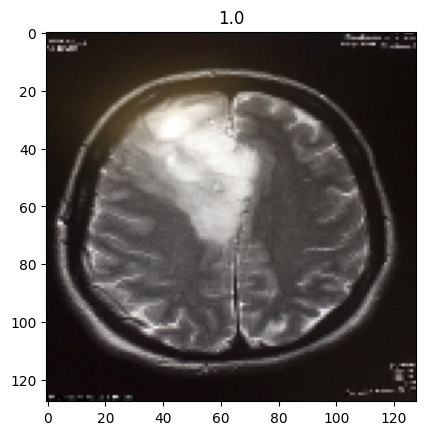

In [7]:
import random as random
index = list(range(len(mri)))
random.shuffle(index)
for idx in index:
    sample = mri[idx]
    img = sample['image']
    #print(img.shape)
    #img = img.reshape(img.shape[1],img.shape[2],img.shape[0])
    #print(img.shape)
    plt.title(sample['label'])
    plt.imshow(img)
    #plt.show()
    #break
    

torch.Size([128, 128, 3])


SystemExit: 

/Users/jihadgarti/anaconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


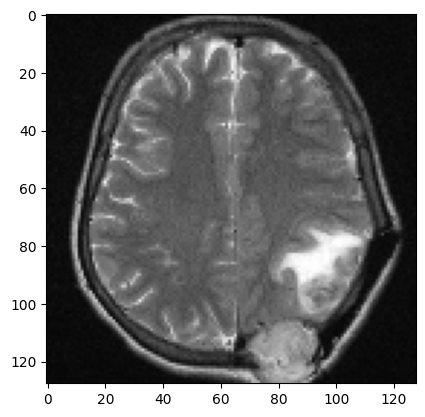

In [8]:
dataloader = DataLoader(mri, batch_size=10 , shuffle= True)

for sample in dataloader:
    img = sample['image']
    img = img[0]
    #img = img.permute(0, 1, 2)
    print(img.shape)
    
    plt.imshow(img)
    sys.exit()
    #plt.show()

In [19]:
import torch.nn as nn 
import torch.nn.functional as F 

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(in_channels= 3, out_channels= 6, kernel_size= 5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride = 5),
            nn.Conv2d(in_channels= 6, out_channels= 16, kernel_size= 5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride = 5))
        
        self.fc_model = nn.Sequential(
            nn.Linear(in_features=256, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120 , out_features= 84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=1))
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        x = F.sigmoid(x)
        
        return x
        

In [20]:
model = CNN()

In [21]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [22]:
model.cnn_model

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Tanh()
  (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Tanh()
  (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
)

In [23]:
model.cnn_model[0].weight.shape

torch.Size([6, 3, 5, 5])

In [24]:
model.fc_model[0].weight.shape


torch.Size([120, 256])